In [1]:
!pip install diffusers transformers accelerate super_image safetensors sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 5.0 MB/s eta 0:00:00


In [2]:
from diffusers import PixArtAlphaPipeline
import torch

pipe = PixArtAlphaPipeline.from_pretrained("PixArt-alpha/PixArt-XL-2-512x512", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-09-08 15:19:21.958304: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-08 15:19:21.958410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-08 15:19:22.116705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/4.19G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.87G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/20.5k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.45G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint were not used when initializing PixArtTransformer2DModel: 
 ['caption_projection.y_embedding']
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def showImage(image):
    image_array = np.array(image).squeeze()
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

In [4]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
translator = T5ForConditionalGeneration.from_pretrained("NlpHUST/t5-vi-en-small")
tokenizer = T5Tokenizer.from_pretrained("NlpHUST/t5-vi-en-small")
translator.to("cuda:1")


config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


T5ForConditionalGeneration(
  (shared): Embedding(250112, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(250112, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo)


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


1.1803593130000536
A programmer wearing headphones.


  0%|          | 0/15 [00:00<?, ?it/s]

13.16878203500005


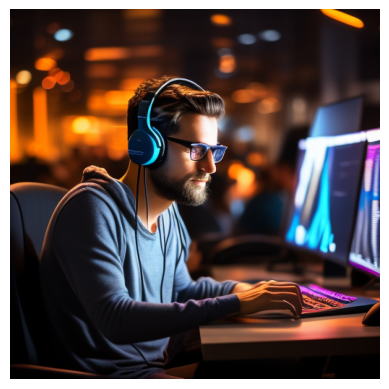

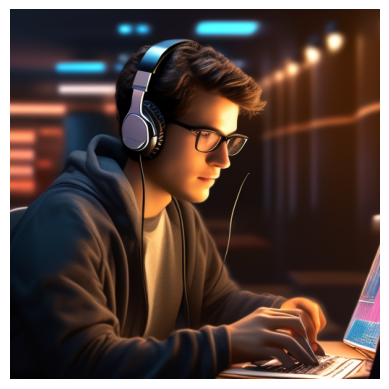

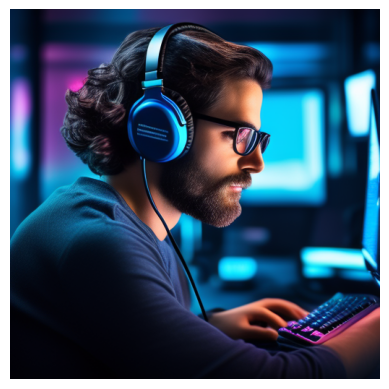

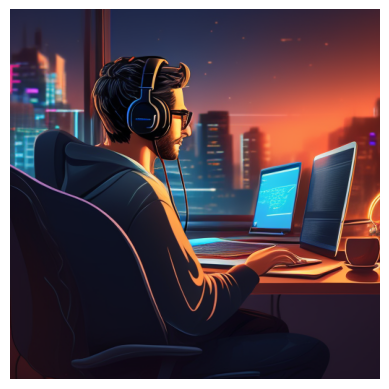

In [5]:
import timeit

src = "một lập trình viên đang đeo tai nghe"
start = timeit.default_timer()
tokenized_text = tokenizer.encode(src, return_tensors="pt").to("cuda:1")
translator.eval()
summary_ids = translator.generate(
                    tokenized_text,
                    max_length=256, 
                    num_beams=10,
                    repetition_penalty=2.5, 
                    length_penalty=1.0, 
                    early_stopping=True
                )
prompt = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
end = timeit.default_timer()
print(end-start)
print(prompt)

negative_prompt = "out of frame, lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature"

start = timeit.default_timer()
images = pipe([prompt] * 4, height=512, width=512, num_inference_steps=15, negative_prompt=[negative_prompt] * 4).images
end = timeit.default_timer()
print(end - start)

for image in images:
    showImage(image)